# Data Loading/Preprocessing

Upload the `A1_DATASET.zip` file from eLearning to the files.

## Preprocessing Explaination

- Remove all other characters
- Trim all remaining strings and filter out those that are empty


In [ ]:
!unzip A1_DATASET.zip

Archive:  A1_DATASET.zip
replace A1_DATASET/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
def read_file(path) -> list[str]:
    """Read in a file and return a list of lines."""
    with open(path, 'r') as f:
        lines = [line.rstrip() for line in f]
    return lines

input_train = read_file('A1_DATASET/train.txt')
input_val = read_file('A1_DATASET/val.txt')
input_train[:3]

['I booked two rooms four months in advance at the Talbott . We were placed on the top floor next to the elevators , which are used all night long . When speaking to the front desk , I was told that they were simply honoring my request for an upper floor , which I had requested for a better view . I am looking at a brick wall , and getting no sleep . He also told me that they had received complaints before from guests on the 16th floor , and were aware of the noise problem . Why then did they place us on this floor when the hotel is not totally booked ? A request for an upper floor does not constitute placing someone on the TOP floor and using that request to justify this . If you decide to stay here , request a room on a lower floor and away from the elevator ! I spoke at length when booking my two rooms about my preferences . This is simply poor treatment of a guest whom they believed would not complain .',
 "I LOVED this hotel . The room was so chic and trendy , the bed was comforta

In [ ]:
def clean_str(input: str) -> str:
    """Remove all but spaces and alpha"""
    input = input.lower().replace('/', ' ')
    return ''.join(char for char in input if char.isalpha() or char in " ").strip()


def preprocess(input: list[str]) -> list[list[str]]:
    """Preprocess the input data according to a set of rules."""
    input = map(clean_str, input)
    return list(filter(lambda line: line != '', map(lambda line: line.split(), input)))

In [ ]:
train = preprocess(input_train)
val = preprocess(input_val)
train[0][:20], val[0][:20]

(['i',
  'booked',
  'two',
  'rooms',
  'four',
  'months',
  'in',
  'advance',
  'at',
  'the',
  'talbott',
  'we',
  'were',
  'placed',
  'on',
  'the',
  'top',
  'floor',
  'next',
  'to'],
 ['i',
  'stayed',
  'for',
  'four',
  'nights',
  'while',
  'attending',
  'a',
  'conference',
  'the',
  'hotel',
  'is',
  'in',
  'a',
  'great',
  'spot',
  'easy',
  'walk',
  'to',
  'michigan'])

# Unsmoothed N-grams

We will calculate the unigram and bigram counts of the training set, where the unigram counts is stored in a dictionary with `{word: count}` and bigrams are stored in a dictionary with `{(word1, word2): count}`.

Then, we'll use the formulas for calculating the unigram/bigram probability models.

In [ ]:
unigram_counts = {}
bigram_counts = {}

# Compute unigram counts
for line in train:
    for word in line:
        if word in unigram_counts:
            unigram_counts[word] += 1
        else:
            unigram_counts[word] = 1

# Compute bigram counts
for line in train:
    for i in range(len(line) - 1):
        bigram = (line[i], line[i + 1])
        if bigram in bigram_counts:
            bigram_counts[bigram] += 1
        else:
            bigram_counts[bigram] = 1

# Compute unigram and bigrams probabilities model
# For unigrams, it's simply the count of word / total number of words
# For bigrams, it's Count(A, B) / Count(A)
unigram_probs = {word: count / sum(unigram_counts.values()) for word, count in unigram_counts.items()}
bigram_probs = {bigram: count / unigram_counts[bigram[0]] for bigram, count in bigram_counts.items()}

In [ ]:
print(unigram_probs['the'])
print(bigram_probs[('the', 'hotel')])

# Print top 10 probable words in both models
print(sorted(unigram_probs.items(), key=lambda x: x[1], reverse=True)[:10])
print(sorted(bigram_probs.items(), key=lambda x: x[1], reverse=True)[:10])

0.06739116619002225
0.07808374198415692
[('the', 0.06739116619002225), ('and', 0.03298379408960915), ('a', 0.028573244359707657), ('to', 0.026564982523037815), ('was', 0.023209405783285668), ('i', 0.021773117254528122), ('in', 0.01604067365745154), ('we', 0.014197648554178583), ('of', 0.013295201779472514), ('hotel', 0.013180807117890055)]
[(('honoring', 'my'), 1.0), (('constitute', 'placing'), 1.0), (('placing', 'someone'), 1.0), (('justify', 'this'), 1.0), (('decide', 'to'), 1.0), (('preferences', 'this'), 1.0), (('believed', 'would'), 1.0), (('keihl', 's'), 1.0), (('junior', 'suite'), 1.0), (('lawry', 's'), 1.0)]


In [ ]:
len(unigram_counts)

5871

In [ ]:
sum(unigram_counts.values())

78675

In [ ]:
print(sorted(unigram_counts.items(), key=lambda x: x[1], reverse=True)[:10])

[('the', 5302), ('and', 2595), ('a', 2248), ('to', 2090), ('was', 1826), ('i', 1713), ('in', 1262), ('we', 1117), ('of', 1046), ('hotel', 1037)]


In [ ]:
unigram_counts.get('is')

837

In [ ]:
print(unigram_probs['the'])
print(unigram_counts['the'])
print(bigram_counts[('the', 'hotel')])
print(bigram_probs[('the', 'hotel')])
print(bigram_counts[('hotel', 'is')])
print(unigram_counts['hotel'])
print(bigram_probs[('hotel', 'is')])

# Print top 10 probable words in both models
print(sorted(unigram_probs.items(), key=lambda x: x[1], reverse=True)[:10])
print(sorted(bigram_probs.items(), key=lambda x: x[1], reverse=True)[:10])

0.06739116619002225
5302
414
0.07808374198415692
112
1037
0.10800385728061716
[('the', 0.06739116619002225), ('and', 0.03298379408960915), ('a', 0.028573244359707657), ('to', 0.026564982523037815), ('was', 0.023209405783285668), ('i', 0.021773117254528122), ('in', 0.01604067365745154), ('we', 0.014197648554178583), ('of', 0.013295201779472514), ('hotel', 0.013180807117890055)]
[(('honoring', 'my'), 1.0), (('constitute', 'placing'), 1.0), (('placing', 'someone'), 1.0), (('justify', 'this'), 1.0), (('decide', 'to'), 1.0), (('preferences', 'this'), 1.0), (('believed', 'would'), 1.0), (('keihl', 's'), 1.0), (('junior', 'suite'), 1.0), (('lawry', 's'), 1.0)]


# Smoothing

To handle unknown words, we replace them with the `<UNKNOWN>` keyword.

We will apply Laplace Smoothing (takes ~52 secs). Additionally, we will apply +2 Smoothing.

In [ ]:
# Add <UNKNOWN> keyword
unigram_counts['<UNKNOWN>'] = 0
bigram_counts[('<UNKNOWN>', '<UNKNOWN>')] = 0

In [ ]:
# Generate list of bigram probabilities with Laplace Smoothing
bigram_probs_smoothed = {}

unigram_list = list(unigram_counts.keys())

for v in unigram_list:
    for k in unigram_list:
        bigram_probs_smoothed[(v, k)] = (bigram_counts.get((v, k), 0) + 1) / (unigram_counts.get(v, 0) + len(unigram_counts))

In [ ]:
# Generate list of bigram probabilities with +2 Smoothing
bigram_probs_smoothed_k = {}

unigram_list = list(unigram_counts.keys())

for v in unigram_list:
    for k in unigram_list:
        bigram_probs_smoothed_k[(v, k)] = (bigram_counts.get((v, k), 0) + 0.05) / (unigram_counts.get(v, 0) + 0.05 * len(unigram_counts))

In [ ]:
print(bigram_probs_smoothed[('the', 'hotel')])
print(bigram_probs_smoothed_k[('the', 'hotel')])

0.03714311286136221
0.07399630063175201


# Perplexity Calculation

In [ ]:
import math

def calculate_perplexity(probabilities, validation_set, is_bigram=False):
    total_log_prob = 0
    token_count = 0

    for line in validation_set:
        for i, word in enumerate(line):
            if is_bigram and i > 0:
                # For bigram model
                prev_word = line[i-1]
                prob = probabilities.get((prev_word, word), probabilities.get(('<UNKNOWN>', '<UNKNOWN>'), 1e-10))
            else:
                # For unigram model
                prob = probabilities.get(word, probabilities.get('<UNKNOWN>', 1e-10))

            print(prob)
            total_log_prob += -math.log(prob)
            token_count += 1

    average_log_prob = total_log_prob / token_count
    perplexity = math.exp(average_log_prob)
    return perplexity


In [ ]:
small_corpus = preprocess(["the hotel is"])
calculate_perplexity(bigram_probs, small_corpus, is_bigram=True)

1e-10
0.07808374198415692
0.10800385728061716


10584.411240539148

In [ ]:
small_corpus

[['the', 'hotel', 'is']]

In [ ]:
# Calculate perplexity for unigram model
unigram_perplexity_train = calculate_perplexity(unigram_probs, train)

# Calculate perplexity for bigram model
bigram_perplexity_train = calculate_perplexity(bigram_probs, train, is_bigram=True)

# Calculate perplexity for Laplace bigram model
bigram_smoothed_perplexity_train = calculate_perplexity(bigram_probs_smoothed, train, is_bigram=True)

# Calculate perplexity for Add-k bigram model
bigram_smoothedk_perplexity_train = calculate_perplexity(bigram_probs_smoothed_k, train, is_bigram=True)


print(f"Unsmoothed Unigram model perplexity: {unigram_perplexity_train}")
print(f"Unsmoothed Bigram model perplexity: {bigram_perplexity_train}")
print(f"Bigram (Laplace) Model Perplexity: {bigram_smoothed_perplexity_train}")
print(f"Bigram (+0.05) Model Perplexity: {bigram_smoothedk_perplexity_train}")


Unsmoothed Unigram model perplexity: 500.7022541594261
Unsmoothed Bigram model perplexity: 35.0589674740015
Bigram (Laplace) Model Perplexity: 1018.151812708026
Bigram (+0.05) Model Perplexity: 152.91736087371228


In [ ]:
# Calculate perplexity for unigram model
unigram_perplexity_valid = calculate_perplexity(unigram_probs, val)

# Calculate perplexity for bigram model
bigram_perplexity_valid = calculate_perplexity(bigram_probs, val, is_bigram=True)

# Calculate perplexity for Laplace-smoothed bigram model
bigram_smoothed_perplexity_valid = calculate_perplexity(bigram_probs_smoothed, val, is_bigram=True)

# Calculate perplexity for Add-k-smoothed bigram model
bigram_smoothedk_perplexity_valid = calculate_perplexity(bigram_probs_smoothed_k, val, is_bigram=True)


print(f"Unigram Model Perplexity: {unigram_perplexity_valid}")
print(f"Bigram Model Perplexity: {bigram_perplexity_valid}")
print(f"Bigram (Laplace Smoothing) Model Perplexity: {bigram_smoothed_perplexity_valid}")
print(f"Bigram (+0.05 Smoothing) Model Perplexity: {bigram_smoothedk_perplexity_valid}")

Unigram Model Perplexity: 729.0068112574407
Bigram Model Perplexity: 30355.48594886052
Bigram (Laplace Smoothing) Model Perplexity: 1384.1037358070637
Bigram (+0.05 Smoothing) Model Perplexity: 467.3276179108557


In [ ]:
import pandas as pd

# Provided perplexity values in the form of variables
perplexity_values = {
    "Unsmoothed Unigram model perplexity (Train)": unigram_perplexity_train,
    "Unsmoothed Bigram model perplexity (Train)": bigram_perplexity_train,
    "Bigram (Laplace) Model Perplexity (Train)": bigram_smoothed_perplexity_train,
    "Bigram (+0.05) Model Perplexity (Train)": bigram_smoothedk_perplexity_train,
    "Unigram Model Perplexity (Validation)": unigram_perplexity_valid,
    "Bigram Model Perplexity (Validation)": bigram_perplexity_valid,
    "Bigram (Laplace Smoothing) Model Perplexity (Validation)": bigram_smoothed_perplexity_valid,
    "Bigram (+0.05 Smoothing) Model Perplexity (Validation)": bigram_smoothedk_perplexity_valid
}

# Restructure into a format where rows represent Unigram/Bigram and columns represent smoothing strategies
perplexity_data = {
    "Unsmoothed (Train)": [perplexity_values["Unsmoothed Unigram model perplexity (Train)"],
                           perplexity_values["Unsmoothed Bigram model perplexity (Train)"]],
    "Laplace Smoothing (Train)": [None, perplexity_values["Bigram (Laplace) Model Perplexity (Train)"]],
    "+0.05 Smoothing (Train)": [None, perplexity_values["Bigram (+0.05) Model Perplexity (Train)"]],
    "Unsmoothed (Validation)": [perplexity_values["Unigram Model Perplexity (Validation)"],
                                perplexity_values["Bigram Model Perplexity (Validation)"]],
    "Laplace Smoothing (Validation)": [None, perplexity_values["Bigram (Laplace Smoothing) Model Perplexity (Validation)"]],
    "+0.05 Smoothing (Validation)": [None, perplexity_values["Bigram (+0.05 Smoothing) Model Perplexity (Validation)"]]
}

# Define the row index as Unigram and Bigram
row_labels = ["Unigram", "Bigram"]

# Create the DataFrame
perplexity_df = pd.DataFrame(perplexity_data, index=row_labels)

# Beautify the table with borders
print(perplexity_df.to_markdown(tablefmt="grid"))

+---------+----------------------+-----------------------------+---------------------------+---------------------------+----------------------------------+--------------------------------+
|         |   Unsmoothed (Train) |   Laplace Smoothing (Train) |   +0.05 Smoothing (Train) |   Unsmoothed (Validation) |   Laplace Smoothing (Validation) |   +0.05 Smoothing (Validation) |
+=========+======================+=============================+===========================+===========================+==================================+================================+
| Unigram |              500.702 |                      nan    |                   nan     |                   729.007 |                            nan   |                        nan     |
+---------+----------------------+-----------------------------+---------------------------+---------------------------+----------------------------------+--------------------------------+
| Bigram  |               35.059 |                     

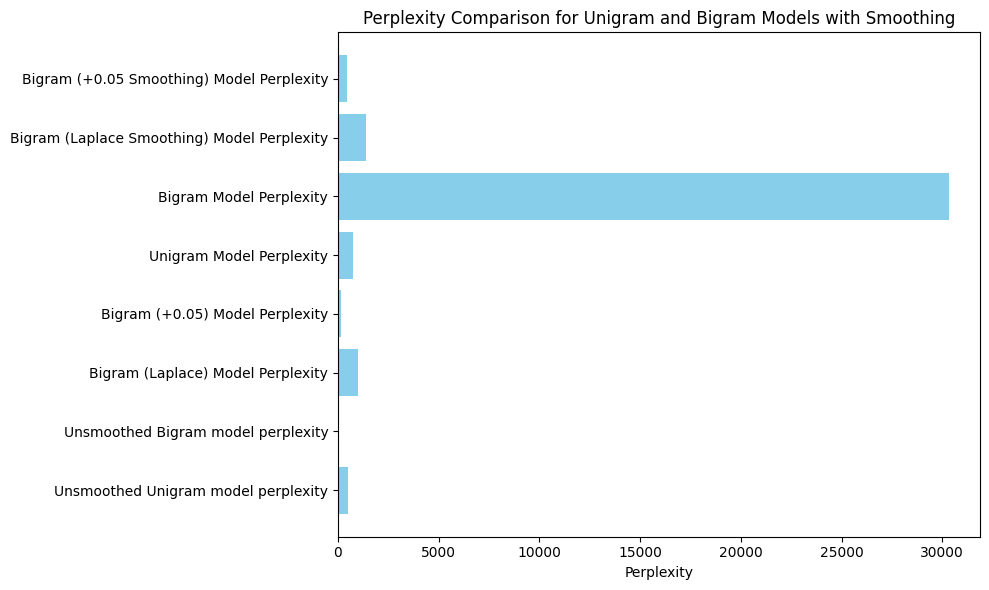

In [ ]:
import matplotlib.pyplot as plt

perplexity_values = {


"Unsmoothed Unigram model perplexity": unigram_perplexity_train,
"Unsmoothed Bigram model perplexity": bigram_perplexity_train,
"Bigram (Laplace) Model Perplexity": bigram_smoothed_perplexity_train,
"Bigram (+0.05) Model Perplexity": bigram_smoothedk_perplexity_train,
"Unigram Model Perplexity": unigram_perplexity_valid,
"Bigram Model Perplexity": bigram_perplexity_valid,
"Bigram (Laplace Smoothing) Model Perplexity": bigram_smoothed_perplexity_valid,
"Bigram (+0.05 Smoothing) Model Perplexity": bigram_smoothedk_perplexity_valid
}

labels = list(perplexity_values.keys())
values = list(perplexity_values.values())

plt.figure(figsize=(10, 6))
plt.barh(labels, values, color="skyblue")
plt.xlabel("Perplexity")
plt.title("Perplexity Comparison for Unigram and Bigram Models with Smoothing")
plt.tight_layout()

plt.show()